##All imports here

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import lightgbm as lgbm
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder , MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

##File handling

In [2]:
import pandas as pd
file_link = 'https://drive.google.com/file/d/1BiYCkiIUS8NOmBaPYXilJISnWW7OnTrf/view?usp=sharing'
file_id = file_link.split('/')[-2]
new = f'https://drive.google.com/uc?id={file_id}'
df = pd.read_csv('property_bd.csv')
df.head()

/var/folders/70/0rb261jx301_1zt04645z6b00000gn/T/ipykernel_59646/3105870831.py:5: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('property_bd.csv')


,area,building_type,building_nature,image_url,num_bath_rooms,num_bed_rooms,price,property_description,property_overview,property_url,...,id,relaxation_amenity_count,security_amenity_count,maintenance_or_cleaning_amenity_count,social_amenity_count,expendable_amenity_count,service_staff_amenity_count,unclassify_amenity_count,division,zone
0,1185.0,Apartment,Residential,https://images-cdn.bproperty.com/thumbnails/15...,0.0,3.0,6100000.0,Grab This 1185 Sq Ft Beautiful Flat Is Vacant ...,This flat consists of facilities you can think...,https://www.bproperty.com/en/property/details-...,...,bproperty-0,0,1,2,0,2,0,3,Dhaka,Khilgaon
1,2464.0,Apartment,Residential,https://images-cdn.bproperty.com/thumbnails/15...,4.0,3.0,28900000.0,A Vibrant 2464 Sq Ft Residential Flat For Sale...,Ready to move in somewhere with everything nea...,https://www.bproperty.com/en/property/details-...,...,bproperty-1,0,2,0,0,3,0,4,Dhaka,Dhanmondi
2,1140.0,Apartment,Residential,https://images-cdn.bproperty.com/thumbnails/15...,0.0,3.0,7500000.0,1140 Sq Ft Nicely Planned Apartment Is Availab...,A spacious 1140 Square Feet apartment in Mirp...,https://www.bproperty.com/en/property/details-...,...,bproperty-2,0,2,2,0,2,0,4,Dhaka,Mirpur
3,1920.0,Apartment,Residential,https://images-cdn.bproperty.com/thumbnails/15...,3.0,3.0,20000000.0,A Modern Well-planned Apartment Of 1920 Sq Ft ...,Looking for the perfect home that offers a lux...,https://www.bproperty.com/en/property/details-...,...,bproperty-3,0,1,2,0,3,0,3,Dhaka,Bashundhara R/A
4,1445.0,Apartment,Residential,https://images-cdn.bproperty.com/thumbnails/15...,3.0,3.0,10800000.0,"1445 Sq Ft Ready Flat For Sale In Banasree, Wi...",Choosing a new home can be an overwhelming exp...,https://www.bproperty.com/en/property/details-...,...,bproperty-4,0,0,2,0,1,0,4,Dhaka,Khilgaon


In [3]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33701 entries, 0 to 33700
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   area                                   33701 non-null  float64
 1   building_type                          33701 non-null  object 
 2   building_nature                        33701 non-null  object 
 3   image_url                              17265 non-null  object 
 4   num_bath_rooms                         33701 non-null  float64
 5   num_bed_rooms                          33701 non-null  float64
 6   price                                  33701 non-null  float64
 7   property_description                   19029 non-null  object 
 8   property_overview                      18509 non-null  object 
 9   property_url                           33679 non-null  object 
 10  purpose                                33701 non-null  object 
 11  ci

(33701, 24)

##Pre-Processing

###Dropped unnecessary features

In [4]:
df = df.drop(['image_url','property_description','property_overview','property_url','id','division','zone','address'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33701 entries, 0 to 33700
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   area                                   33701 non-null  float64
 1   building_type                          33701 non-null  object 
 2   building_nature                        33701 non-null  object 
 3   num_bath_rooms                         33701 non-null  float64
 4   num_bed_rooms                          33701 non-null  float64
 5   price                                  33701 non-null  float64
 6   purpose                                33701 non-null  object 
 7   city                                   33701 non-null  object 
 8   locality                               33701 non-null  object 
 9   relaxation_amenity_count               33701 non-null  int64  
 10  security_amenity_count                 33701 non-null  int64  
 11  ma

In [5]:
df.isnull().sum()
df.nunique()

area                                     2180
building_type                              12
building_nature                             2
num_bath_rooms                             17
num_bed_rooms                              40
price                                    3382
purpose                                     2
city                                       44
locality                                  215
relaxation_amenity_count                    6
security_amenity_count                      6
maintenance_or_cleaning_amenity_count       4
social_amenity_count                        6
expendable_amenity_count                    7
service_staff_amenity_count                 5
unclassify_amenity_count                   19
dtype: int64

###Fitered data of Dhaka

In [8]:
df = df[
        (df["num_bed_rooms"] > 0) &
        (df["num_bath_rooms"] > 0) &
        (df["price"].between(10000, 2e5)) &
        (df['city']=='Dhaka') &
        (df['purpose'].str.lower() =='rent') 
    ]
features = df.drop(['price','city','purpose'], axis=1)
target = df['price']
target_transformed = np.log(target)

print(df.shape)
df.nunique()

(10522, 24)


area                                       662
building_type                                4
building_nature                              2
image_url                                  848
num_bath_rooms                              10
num_bed_rooms                               10
price                                      149
property_description                      1092
property_overview                          789
property_url                             10522
purpose                                      1
city                                         1
locality                                    93
address                                    178
id                                       10522
relaxation_amenity_count                     5
security_amenity_count                       5
maintenance_or_cleaning_amenity_count        4
social_amenity_count                         5
expendable_amenity_count                     7
service_staff_amenity_count                  5
unclassify_am

In [5]:
print(target.max())
print(target.mean())
print(target.min())

200000.0
41817.648260786926
10000.0


###Splitting Data

In [8]:
X_train, X_test, y_train, y_test = train_test_split(features, target_transformed, test_size=0.2, random_state=42)
#seperating categorical and numerical cols
cat_cols=features.select_dtypes(include=['object']).columns.tolist()
num_cols = features.select_dtypes(include=np.number).columns.tolist()
print(cat_cols)
print(num_cols)

['building_type', 'building_nature', 'locality']
['area', 'num_bath_rooms', 'num_bed_rooms', 'relaxation_amenity_count', 'security_amenity_count', 'maintenance_or_cleaning_amenity_count', 'social_amenity_count', 'expendable_amenity_count', 'service_staff_amenity_count', 'unclassify_amenity_count']


###Scaling and Encoding

In [9]:
scaler = MinMaxScaler()
encoder = OneHotEncoder(sparse_output=False,handle_unknown='ignore')
preprocessor = ColumnTransformer(
    transformers=[
        ("num", scaler, num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ])

###Co-relation Matrix

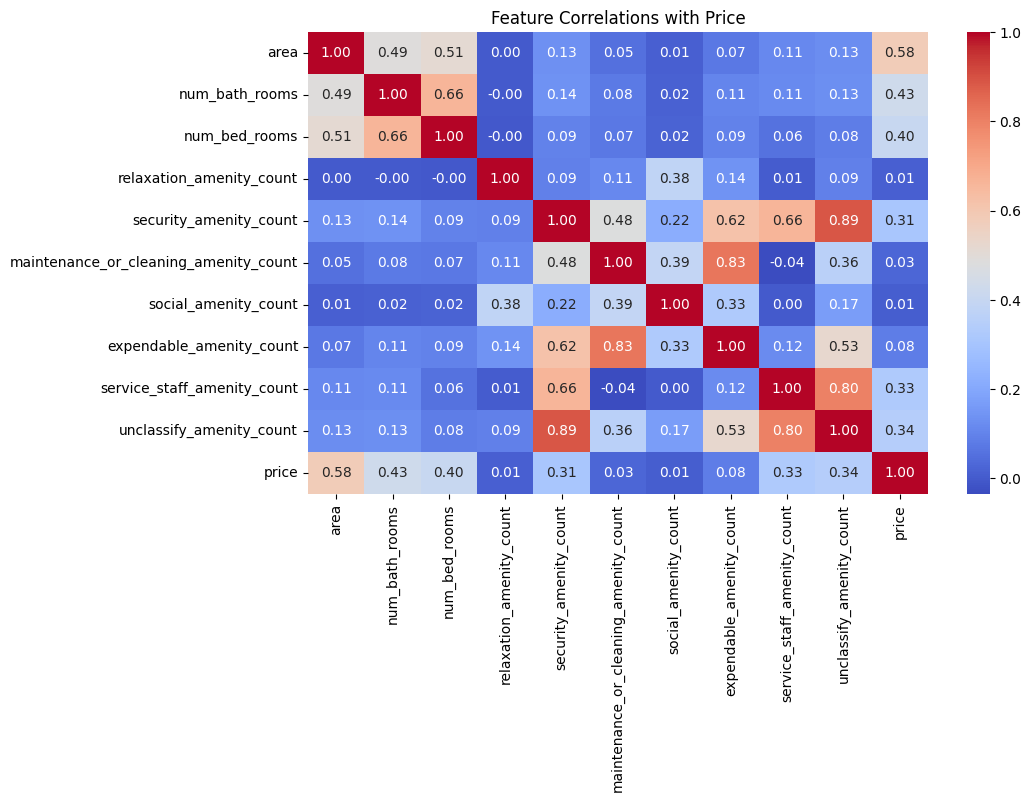

In [10]:
corr_matrix = df[num_cols + ["price"]].corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlations with Price")
plt.show()

###Variance Plot

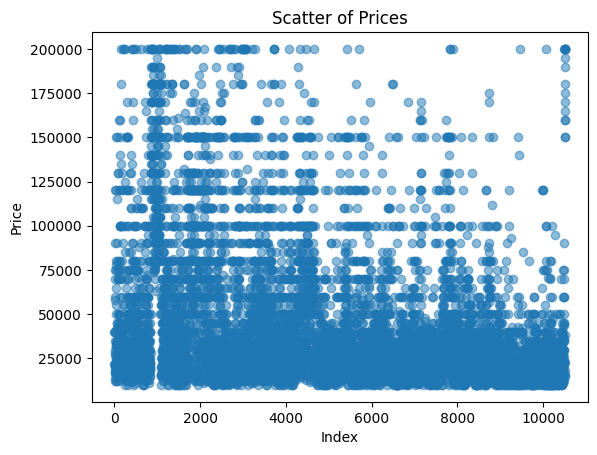

In [11]:
plt.scatter(range(len(df)), df['price'], alpha=0.5)
plt.xlabel("Index")
plt.ylabel("Price")
plt.title("Scatter of Prices")
plt.show()

##Models

###Linear Regression

In [12]:
linearRegression = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("regressor", LinearRegression())
    ]
)

linearRegression.fit(X_train, y_train)
y_pred = linearRegression.predict(X_test)
y_pred = np.exp(y_pred)
y_test_orig = np.exp(y_test)


lr_mae = mean_absolute_error(y_test_orig, y_pred)
lr_mse = mean_squared_error(y_test_orig, y_pred)
lr_r2 = r2_score(y_test_orig, y_pred)
lr_mape = mean_absolute_percentage_error(y_test_orig,y_pred)

print(f"R²   : {lr_r2:.3f}")
print(f"MAE  : {lr_mae:.2f}")
print(f"MAPE   : {lr_mape:.3f}")

R²   : -1.149
MAE  : 12422.31
MAPE   : 0.251


###Important features plot

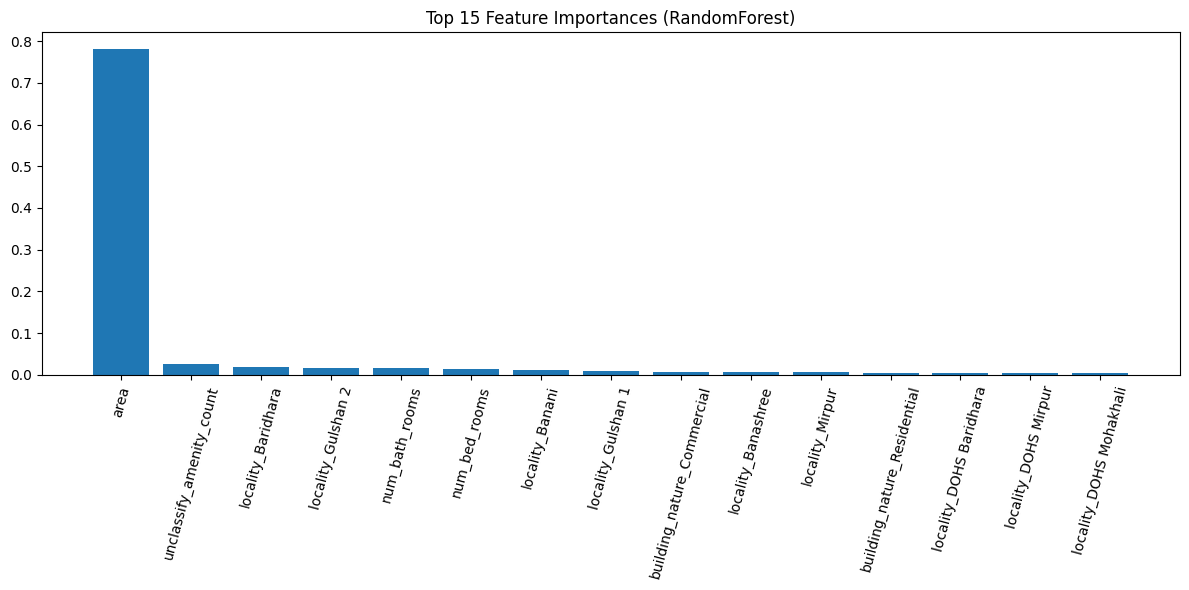

In [13]:
# After fitting model with RandomForest
rf_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(n_estimators=200, random_state=42))
])
rf_model.fit(X_train, y_train)

# Get feature names after preprocessing
feature_names = (num_cols +
                 list(preprocessor.transformers_[1][1] # OneHotEncoder
                      .get_feature_names_out(cat_cols)))


importances = rf_model.named_steps["regressor"].feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12,6))
plt.bar(range(15), importances[indices][:15], align="center")
plt.xticks(range(15), [feature_names[i] for i in indices[:15]], rotation=75)
plt.title("Top 15 Feature Importances (RandomForest)")
plt.tight_layout()
plt.show()

###Random Forest Regression

In [14]:
rf_regressor = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("regressor", RandomForestRegressor(random_state=42))
    ]
)

param_grid = {
    "regressor__n_estimators": [100, 300, 500, 700],
    "regressor__max_depth": [5, 10, 15,20,25],
    "regressor__min_samples_split": [2, 5, 10,15]
}

randomForest = GridSearchCV(
    rf_regressor,
    param_grid,
    cv=3,
    scoring="r2",
    n_jobs=4
)


randomForest.fit(X_train, y_train)
y_pred = randomForest.predict(X_test)
y_pred = np.exp(y_pred)
y_test_orig = np.exp(y_test)


rf_mae = mean_absolute_error(y_test_orig, y_pred)
rf_mse = mean_squared_error(y_test_orig, y_pred)
rf_r2 = r2_score(y_test_orig, y_pred)
rf_mape = mean_absolute_percentage_error(y_test_orig,y_pred)

print("Best params:", randomForest.best_params_)
print("Best CV R²:", randomForest.best_score_)

print(f"R²   : {rf_r2:.3f}")
print(f"MAE  : {rf_mae:.2f}")
print(f"MAPE   : {rf_mape:.3f}")

Best params: {'regressor__max_depth': 25, 'regressor__min_samples_split': 15, 'regressor__n_estimators': 700}
Best CV R²: 0.8547990743189144
R²   : 0.809
MAE  : 8940.26
MAPE   : 0.197


###XGBR

In [15]:
xgb =Pipeline(
    steps = [
        ("preprocessor",preprocessor),
        ("regressor",XGBRegressor(n_estimators=1000, learning_rate=0.07, n_jobs=5))
])


xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
y_pred = np.exp(y_pred)
y_test_orig = np.exp(y_test)


xgb_mae = mean_absolute_error(y_test_orig, y_pred)
xgb_mse = mean_squared_error(y_test_orig, y_pred)
xgb_r2 = r2_score(y_test_orig, y_pred)
xgb_mape = mean_absolute_percentage_error(y_test_orig,y_pred)

print(f"R²   : {xgb_r2:.3f}")
print(f"MAE  : {xgb_mae:.2f}")
print(f"MAPE   : {xgb_mape:.3f}")

R²   : 0.782
MAE  : 9016.97
MAPE   : 0.190


###XGBR Tuned

In [16]:

xgb_t = Pipeline(
    steps = [
        ("preprocessor", preprocessor),
        ("regressor", XGBRegressor(n_jobs=4, random_state=42)) # Added random_state for reproducibility
])


param_grid = {
    "regressor__n_estimators": [100, 300, 500],
    "regressor__max_depth": [3, 5, 7, 9],
    "regressor__learning_rate": [0.01, 0.05, 0.1, 0.2],
    "regressor__subsample": [0.8, 0.9],
    "regressor__colsample_bytree": [0.8, 0.9]
}


xgb_tuned = GridSearchCV(
    xgb_t,
    param_grid,
    cv=3,
    scoring="r2",
    n_jobs=1 
)


xgb_tuned.fit(X_train, y_train)


y_pred_log = xgb_tuned.predict(X_test)
y_pred_orig = np.exp(y_pred_log)
y_test_orig = np.exp(y_test)


xgb_tuned_r2 = r2_score(y_test_orig, y_pred_orig)
xgb_tuned_mae = mean_absolute_error(y_test_orig, y_pred_orig)
xgb_tuned_mape = mean_absolute_percentage_error(y_test_orig, y_pred_orig)

print("Best params:", xgb_tuned.best_params_)
print("Best CV R²:", xgb_tuned.best_score_)
print(f"Tuned XGB R²: {xgb_tuned_r2:.3f}")
print(f"Tuned XGB MAE: {xgb_tuned_mae:.2f}")
print(f"Tuned XGB MAPE: {xgb_tuned_mape:.3f}")

Best params: {'regressor__colsample_bytree': 0.9, 'regressor__learning_rate': 0.1, 'regressor__max_depth': 3, 'regressor__n_estimators': 500, 'regressor__subsample': 0.9}
Best CV R²: 0.8721744359033149
Tuned XGB R²: 0.788
Tuned XGB MAE: 8951.41
Tuned XGB MAPE: 0.189


###Light GBM

In [17]:
import lightgbm as lgbm

lgbm_regressor = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("regressor", lgbm.LGBMRegressor(random_state=42))
    ]
)


lgbm_regressor.fit(X_train, y_train)
y_pred = lgbm_regressor.predict(X_test)
y_pred = np.exp(y_pred)
y_test_orig = np.exp(y_test)


lgbm_mae = mean_absolute_error(y_test_orig, y_pred)
lgbm_mse = mean_squared_error(y_test_orig, y_pred)
lgbm_r2 = r2_score(y_test_orig, y_pred)
lgbm_mape = mean_absolute_percentage_error(y_test_orig,y_pred)
score = cross_val_score(xgb, features, target, cv=5, scoring="r2")

print(f"R²   : {lgbm_r2:.3f}")
print(f"MAE  : {lgbm_mae:.2f}")
print(f"MAPE   : {lgbm_mape:.3f}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004110 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 389
[LightGBM] [Info] Number of data points in the train set: 8417, number of used features: 57
[LightGBM] [Info] Start training from score 10.341973


/Volumes/Projects/mL/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


R²   : 0.782
MAE  : 9137.80
MAPE   : 0.195


###LGBM Tuned

In [18]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform , loguniform

# Define the pipeline inside the search to include the preprocessor
lgbm_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', lgbm.LGBMRegressor(random_state=42, verbosity=-1))
])

# Define the parameter distribution
param_distributions = {
    'regressor__n_estimators': randint(100, 1000),
    'regressor__learning_rate': loguniform(1e-3, 0.1), # Note: loguniform for learning rate
    'regressor__max_depth': randint(3, 15),
    'regressor__num_leaves': randint(20, 100),
    'regressor__min_child_samples': randint(10, 50),
    'regressor__subsample': uniform(0.6, 0.4), # range 0.6 to 1.0
    'regressor__colsample_bytree': uniform(0.6, 0.4),
    'regressor__reg_alpha': loguniform(1e-5, 10), # L1 regularization
    'regressor__reg_lambda': loguniform(1e-5, 10), # L2 regularization
}

# Perform RandomizedSearchCV
lgbm_random_search = RandomizedSearchCV(
    lgbm_pipe,
    param_distributions,
    n_iter=50, # Number of parameter combinations to try
    cv=3,
    scoring='r2',
    n_jobs=4,
    random_state=42,
    verbose=1
)

lgbm_random_search.fit(X_train, y_train)

y_pred = lgbm_random_search.predict(X_test)
y_pred = np.exp(y_pred)
y_test_orig = np.exp(y_test)

lgbmt_mae = mean_absolute_error(y_test_orig, y_pred)
lgbmt_r2 = r2_score(y_test_orig, y_pred)
lgbmt_mape = mean_absolute_percentage_error(y_test_orig,y_pred)

print("Best parameters:", lgbm_random_search.best_params_)
print("Best score:", lgbm_random_search.best_score_)

print(f"R²   : {lgbmt_r2:.3f}")
print(f"MAE  : {lgbmt_mae:.2f}")
print(f"MAPE   : {lgbmt_mape:.3f}")

Fitting 3 folds for each of 50 candidates, totalling 150 fits


/Volumes/Projects/mL/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Volumes/Projects/mL/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Volumes/Projects/mL/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Volumes/Projects/mL/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Volumes/Projects/mL/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with featur

Best parameters: {'regressor__colsample_bytree': np.float64(0.9272059063689972), 'regressor__learning_rate': np.float64(0.05265761277157429), 'regressor__max_depth': 9, 'regressor__min_child_samples': 15, 'regressor__n_estimators': 555, 'regressor__num_leaves': 46, 'regressor__reg_alpha': np.float64(0.0031949643669861704), 'regressor__reg_lambda': np.float64(0.00021510319582575765), 'regressor__subsample': np.float64(0.6479461469334731)}
Best score: 0.8564608878063532
R²   : 0.782
MAE  : 9180.07
MAPE   : 0.194


/Volumes/Projects/mL/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


##Performance Comparison

###R2 Score 

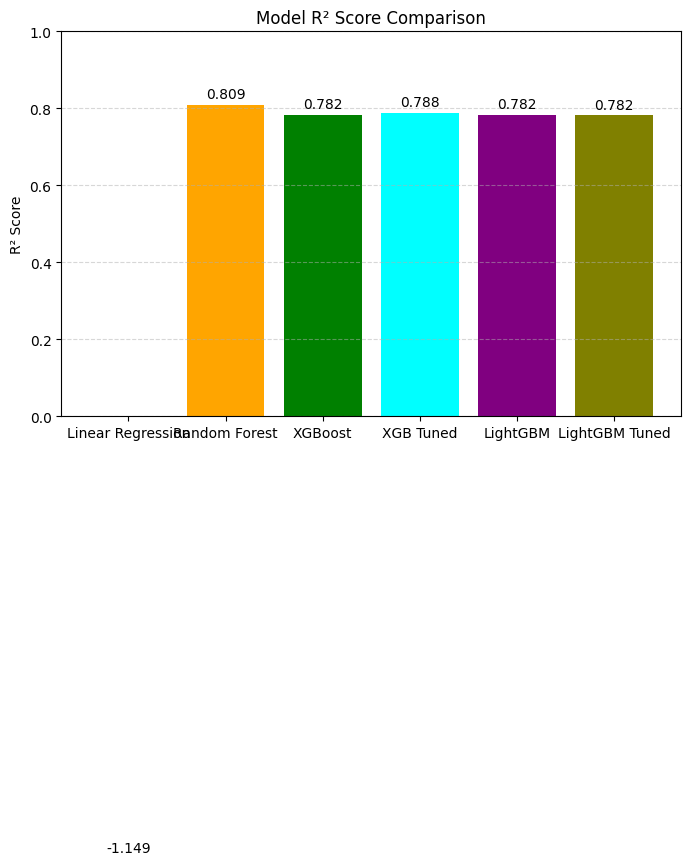

In [19]:

model_names = ["Linear Regression", "Random Forest", "XGBoost","XGB Tuned" ,"LightGBM","LightGBM Tuned"]
r2_scores = [
    lr_r2,      # Linear Regression
    rf_r2,      # Random Forest
    xgb_r2,     # XGBoost
    xgb_tuned_r2,# XGBoost Tuned
    lgbm_r2,     # LightGBM
    lgbmt_r2     # LightGBM Tuned
]


plt.figure(figsize=(8,5))
bars = plt.bar(model_names, r2_scores, color=["skyblue", "orange", "green","cyan", "purple","olive"])
plt.ylabel("R² Score")
plt.title("Model R² Score Comparison")
plt.ylim(0, 1)
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Annotate bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f"{bar.get_height():.3f}", ha="center", va="bottom", fontsize=10)

plt.show()

###MAE Score

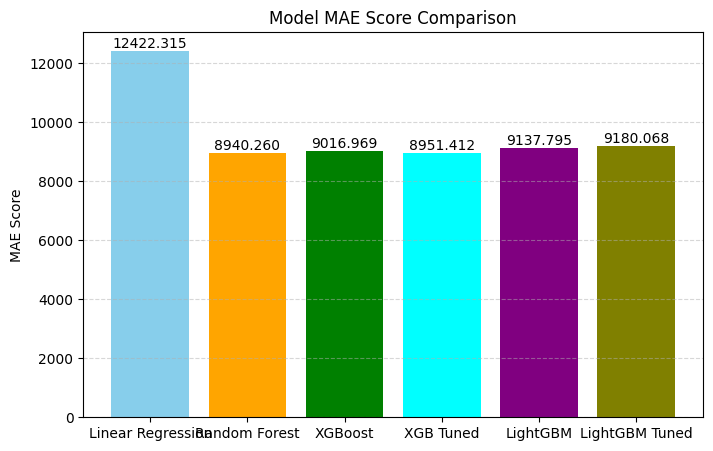

In [20]:

mae = [
    lr_mae,      # Linear Regression
    rf_mae,      # Random Forest
    xgb_mae,     # XGBoost
    xgb_tuned_mae,# XGBoost Tuned
    lgbm_mae,     # LightGBM
    lgbmt_mae     # LightGBM
]
model_names = ["Linear Regression", "Random Forest", "XGBoost","XGB Tuned" ,"LightGBM","LightGBM Tuned"]


plt.figure(figsize=(8,5))
bars = plt.bar(model_names, mae, color=["skyblue", "orange", "green","cyan" ,"purple","olive"])
plt.ylabel("MAE Score")
plt.title("Model MAE Score Comparison")
# Remove or adjust this line:
# plt.ylim(0, 1)
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Annotate bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f"{bar.get_height():.3f}", ha="center", va="bottom", fontsize=10)

plt.show()

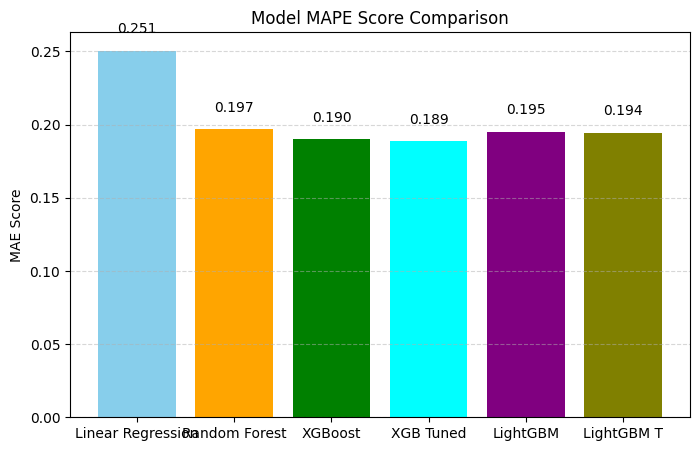

In [21]:

mape = [
    lr_mape,      # Linear Regression
    rf_mape,      # Random Forest
    xgb_mape,     # XGBoost
    xgb_tuned_mape,# XGBoost Tuned
    lgbm_mape,     # LightGBM
    lgbmt_mape     # LightGBM
]
model_names = ["Linear Regression", "Random Forest", "XGBoost","XGB Tuned" , "LightGBM","LightGBM T"]


plt.figure(figsize=(8,5))
bars = plt.bar(model_names, mape, color=["skyblue", "orange", "green", "cyan","purple","olive"])
plt.ylabel("MAE Score")
plt.title("Model MAPE Score Comparison")
# Remove or adjust this line:
# plt.ylim(0, 1)
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Annotate bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f"{bar.get_height():.3f}", ha="center", va="bottom", fontsize=10)

plt.show()